# Sentiment Analysis

LSTM Architecture

In [2]:
import pandas as pd
import seaborn as sns

Exploratory the data

In [3]:
train = pd.read_csv('Tweets.csv')
train.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [4]:
train.tail()

textID                                               text  \
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral

In [5]:
train.shape

(27481, 4)

<Axes: xlabel='sentiment'>

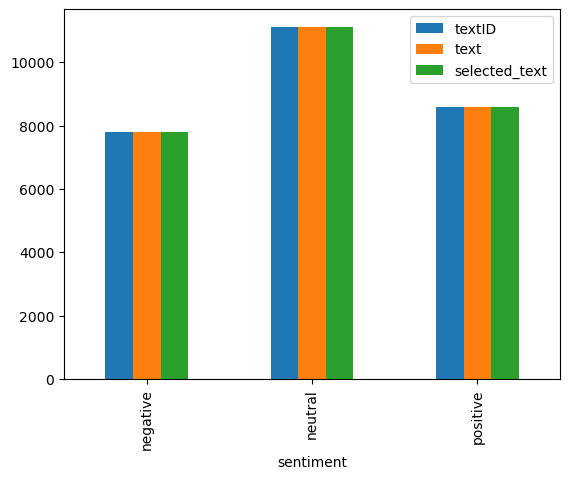

In [6]:
train.groupby('sentiment').count().plot.bar()

Cleaning the data

In [7]:
train.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [8]:
#we drop nan values
train = train.dropna()
#we drop unnecessary columns
train = train.drop(['textID','selected_text'],axis=1)

In [9]:
train.isnull().sum()

text         0
sentiment    0
dtype: int64

In [10]:
#we chek ifwe have duplicate data
train.duplicated().sum()

0

In [11]:
train.replace({'sentiment':{'neutral':0,'negative':1,'positive':2}},inplace=True)
train.head()

text  sentiment
0                I`d have responded, if I were going          0
1      Sooo SAD I will miss you here in San Diego!!!          1
2                          my boss is bullying me...          1
3                     what interview! leave me alone          1
4   Sons of ****, why couldn`t they put them on t...          1

In [12]:
#we only want to knwo if a tweet is positive or negative : drop neutral
train = train[train['sentiment'] != 0]
train.head()

text  sentiment
1      Sooo SAD I will miss you here in San Diego!!!          1
2                          my boss is bullying me...          1
3                     what interview! leave me alone          1
4   Sons of ****, why couldn`t they put them on t...          1
6  2am feedings for the baby are fun when he is a...          2

<Axes: xlabel='sentiment'>

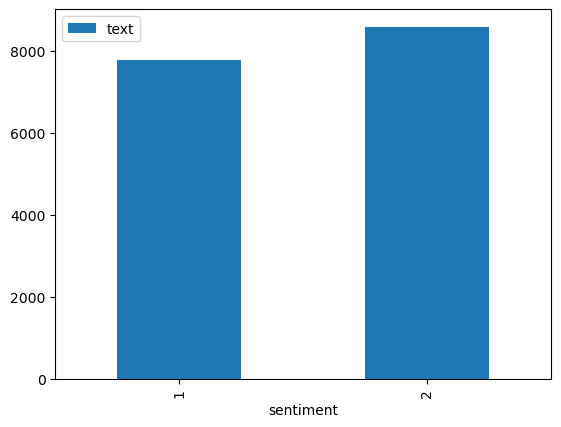

In [13]:
train.groupby('sentiment').count().plot.bar()

Tokenisation

In [14]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

In [15]:
maxfeatures = 5000

tokenizer = Tokenizer(num_words = maxfeatures,filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~')
tokenizer.fit_on_texts(train['text'].values)

X = tokenizer.texts_to_sequences(train['text'].values)
X = pad_sequences(X,padding='post')

In [16]:
from sklearn.model_selection import train_test_split , cross_val_score

In [19]:
labels = pd.get_dummies(train['sentiment']).values
X_train, X_val, Y_train, Y_val = train_test_split(X,labels, test_size = 0.33, random_state = 42)
print("Input training :X_train and Y_train shape are {},{}".format(X_train.shape,Y_train.shape))
print("Input validation : X_val and Y_val shape are {}, {}".format(X_val.shape,Y_val.shape))

Input training :X_train and Y_train shape are (10963, 34),(10963, 2)
Input validation : X_val and Y_val shape are (5400, 34), (5400, 2)


LSTM architecture

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Embedding, Dense, GlobalMaxPool1D,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from keras.regularizers import l2

In [42]:
embedding_dimension = 128
LSTM_model = Sequential()
LSTM_model.add(Embedding(maxfeatures, embedding_dimension, input_length = X.shape[1]))
LSTM_model.add(SpatialDropout1D(0.4))
LSTM_model.add(LSTM(128, kernel_regularizer=l2(0.1),  dropout=0.4,recurrent_dropout=0.4))
LSTM_model.add(Dense(2, activation='softmax'))
LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
LSTM_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 34, 128)           640000    
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 34, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 771,842
Trainable params: 771,842
Non-trainable params: 0
_________________________________________________________________


In [43]:
batch_size = 256
LSTM_model_history = LSTM_model.fit(X_train,Y_train, epochs = 50, batch_size=batch_size, verbose=1, shuffle=True,validation_data=(X_val,Y_val))

Epoch 1/50
43/43 [==============================] - 14s 260ms/step - loss: 11.6341 - accuracy: 0.5292 - val_loss: 4.9611 - val_accuracy: 0.5157
Epoch 2/50
43/43 [==============================] - 11s 254ms/step - loss: 2.5196 - accuracy: 0.7407 - val_loss: 1.0401 - val_accuracy: 0.8219
Epoch 3/50
43/43 [==============================] - 11s 256ms/step - loss: 0.6183 - accuracy: 0.8604 - val_loss: 0.4321 - val_accuracy: 0.8441
Epoch 4/50
43/43 [==============================] - 11s 256ms/step - loss: 0.3218 - accuracy: 0.8907 - val_loss: 0.3513 - val_accuracy: 0.8583
Epoch 5/50
43/43 [==============================] - 12s 274ms/step - loss: 0.2591 - accuracy: 0.9119 - val_loss: 0.3680 - val_accuracy: 0.8537
Epoch 6/50
43/43 [==============================] - 11s 262ms/step - loss: 0.2475 - accuracy: 0.9171 - val_loss: 0.3971 - val_accuracy: 0.8541
Epoch 7/50
43/43 [==============================] - 11s 259ms/step - loss: 0.2251 - accuracy: 0.9237 - val_loss: 0.3625 - val_accuracy: 0.847

In [45]:
import matplotlib.pyplot as plt

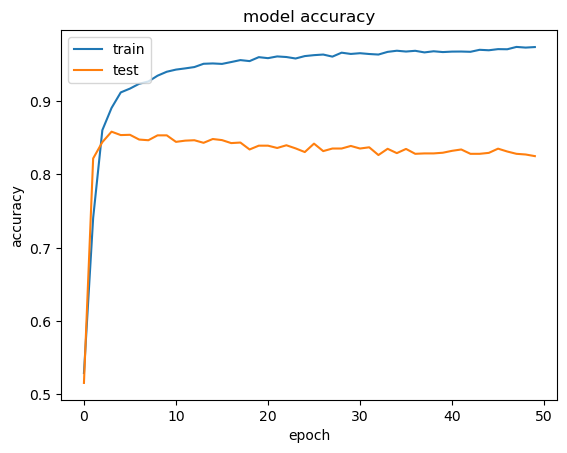

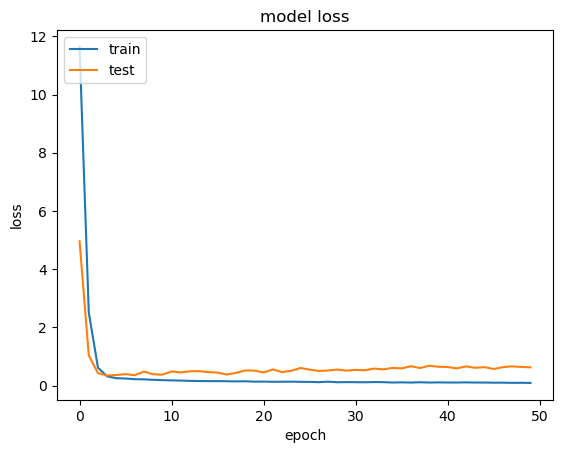

In [46]:
# summarize history for accuracy
plt.plot(LSTM_model_history.history['accuracy'])
plt.plot(LSTM_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(LSTM_model_history.history['loss'])
plt.plot(LSTM_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
LSTM_model.save('SentimentDetection_LSTM.h5')

Result

In [66]:
#Now we can predict some exemple 
import numpy as np
tweet = [" I am in love!! <3 <3"]
Xt = tokenizer.texts_to_sequences(tweet)
Xt = pad_sequences(Xt,maxlen= 34, padding='post')
class_prob = LSTM_model.predict(Xt, batch_size=1)[0]
if np.argmax(class_prob)== 0:
  print("Negative Sentiment")
else:
  print("Positive Sentiment")

1/1 [==============================] - 0s 27ms/step
Positive Sentiment


In [67]:
tweet = ["I hate this world"]
Xt = tokenizer.texts_to_sequences(tweet)
Xt = pad_sequences(Xt,maxlen= 34, padding='post')
class_prob = LSTM_model.predict(Xt, batch_size=1)[0]
if np.argmax(class_prob)== 0:
  print("Negative Sentiment")
else:
  print("Positive Sentiment")

1/1 [==============================] - 0s 25ms/step
Negative Sentiment


In [68]:
tweet = ["I believe in you"]
Xt = tokenizer.texts_to_sequences(tweet)
Xt = pad_sequences(Xt,maxlen= 34, padding='post')
class_prob = LSTM_model.predict(Xt, batch_size=1)[0]
if np.argmax(class_prob)== 0:
  print("Negative Sentiment")
else:
  print("Positive Sentiment")

1/1 [==============================] - 0s 26ms/step
Positive Sentiment


In [69]:
tweet = ["You are fucking stupid"]
Xt = tokenizer.texts_to_sequences(tweet)
Xt = pad_sequences(Xt,maxlen= 34, padding='post')
class_prob = LSTM_model.predict(Xt, batch_size=1)[0]
if np.argmax(class_prob)== 0:
  print("Negative Sentiment")
else:
  print("Positive Sentiment")

1/1 [==============================] - 0s 23ms/step
Negative Sentiment


The end 